In [1]:
### Import necessary modules
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

In [2]:

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing
import globalfunction.pp as pp  # importing

import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys
import sklearn.metrics

from sklearn.linear_model import LinearRegression

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

In [3]:

import numpy as np
import pandas as pd

#df = vv.dataset_modelling_version(iteration_code="0042_20220710", row_limit=750)
df = vv.dataset_modelling_version(iteration_code="0042_20220710")
print(df.shape)
df.head(20)

df = vv.tidy_dataset(df, coerce_to_float=['location.latitude'], na_infer_median=['bedrooms_model', 'bathrooms_model'], na_drop_column=[])

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:439: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 24143/49617/44393/44954/16764 ==> 24143/40079/39870/39886/16764
type <class 'pandas.core.indexes.base.Index'>
Index(['Price', 'location.latitude', 'location.longitude',
       'distance_to_any_train', 'bedrooms_model', 'bathrooms_model',
       'analyticsProperty.imageCount', 'analyticsProperty.added',
       'floorplan_count', 'property_age', 'property_age',
       'borough_name_Barking and Dagenham', 'borough_name_Barnet',
       'borough_name_Bexley', 'borough_name_City of London',
       'borough_name_Croydon', 'borough_name_Ealing', 'borough_name_Enfield',
       'borough_name_Greenwich', 'borough_name_Havering',
       'borough_name_Hillingdon', 'borough_name_Hounslow',
       'borough_name_Islington', 'borough_name_Kensington and Chelsea',
       'borough_name_Kingston upon Thames', 'borough_name_Lambeth',
       'borough_name_Lewisham', 'borough_name_Merton', 'borough_name_Newham',
       'borough_name_Redbridge', 'borough_name_Richmond upon Thames',
       '

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_dataset[each].fillna(median_each, inplace=True)
/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_dataset[each].fillna(median_each, inplace=True)


In [4]:
df = vv.tidy_dataset(df, coerce_to_float=['location.latitude'], na_infer_median=['bedrooms_model', 'bathrooms_model'], na_drop_column=['property_age'],
                     na_drop_rows=['analyticsProperty.imageCount', 'analyticsProperty.added'])

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_dataset[each].fillna(median_each, inplace=True)
/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_dataset[each].fillna(median_each, inplace=True)


In [5]:
if False:
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler

    from sklearn.base import BaseEstimator, TransformerMixin

    # column index
    rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


    class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
        def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
            self.add_bedrooms_per_room = add_bedrooms_per_room

        def fit(self, X, y=None):
            return self  # nothing else to do

        def transform(self, X):

            return X

            rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
            population_per_household = X[:, population_ix] / X[:, households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
                return np.c_[X, rooms_per_household, population_per_household,
                             bedrooms_per_room]
            else:
                return np.c_[X, rooms_per_household, population_per_household]


    # num_pipeline = Pipeline([
    #     ('imputer', SimpleImputer(strategy='median')),
    #     ('attribs_adder', CombinedAttributesAdder())
    #     ('std_scaler', StandardScaler())
    # ])

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

    housing_num_tr = num_pipeline.fit_transform(df)

In [6]:
# df = vv.tidy_dataset(df, coerce_to_float=['location.latitude'], na_infer_median=['bedrooms_model', 'bathrooms_model'], na_drop_column=['property_age'],
#                      na_drop_rows=['analyticsProperty.imageCount', 'analyticsProperty.added'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22254 entries, 85780593 to 114438299
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Price                                              22254 non-null  float64
 1   location.latitude                                  22252 non-null  float64
 2   location.longitude                                 22254 non-null  float64
 3   distance_to_any_train                              22254 non-null  float64
 4   bedrooms_model                                     21461 non-null  float64
 5   bathrooms_model                                    22254 non-null  float64
 6   analyticsProperty.imageCount                       22254 non-null  int64  
 7   analyticsProperty.added                            22254 non-null  int64  
 8   floorplan_count                                    22254 non-null  float64
 9   

In [8]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
119764643,500000.0,51.544998,-0.477813,0.1,NaN,2.0,21,20220209,1.0,0,...,0,0,1,0,0,0,0,0,1,0
85735581,550000.0,51.505862,-0.099340,0.3,NaN,1.0,12,20220711,4.0,0,...,0,0,0,0,0,0,0,0,1,0
123924056,540000.0,51.506340,-0.101020,0.2,NaN,1.0,15,20220615,4.0,0,...,0,0,0,0,0,0,0,0,1,0
85668441,540000.0,51.506375,-0.100924,0.2,NaN,1.0,15,20220613,4.0,0,...,0,0,0,0,0,0,0,0,1,0
73439158,520000.0,51.497060,-0.099820,0.1,NaN,1.0,15,20190809,4.0,0,...,0,0,0,0,0,0,0,0,1,0
118914836,499950.0,51.502178,-0.076071,0.5,NaN,1.0,12,20220119,4.0,0,...,0,0,0,0,0,0,0,0,1,0
73439134,480000.0,51.497060,-0.099820,0.1,NaN,1.0,16,20190809,4.0,0,...,0,0,0,0,0,0,0,0,1,0
89339563,450000.0,51.492595,-0.098050,0.2,NaN,1.0,15,20210225,4.0,0,...,0,0,0,0,0,0,0,0,1,0
123590483,425000.0,51.504065,-0.075040,0.4,NaN,1.0,10,20220523,4.0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
df.dropna(inplace=True)

In [10]:
y = df['Price']
X = df.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [11]:
from sklearn import linear_model

#reg = linear_model.LinearRegression()
#reg = linear_model.Ridge(alpha=.5)
reg = linear_model.Ridge(alpha=.5)

#reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.fit(X_train, y_train)
LinearRegression()
reg.coef_


array([ 3.36775683e+05, -7.78770823e+04, -3.33064297e+04,  4.30142072e+04,
        3.87901058e+04,  2.14641771e+03,  1.13463088e+00,  1.26930459e+03,
       -1.58430505e+04,  4.58200000e+04, -5.17838054e+03,  9.94577253e+04,
       -7.94157026e+02, -1.30221193e+04, -5.32903117e+04, -4.00754443e+03,
       -1.17839788e+04, -8.66906932e+03, -4.62492605e+04,  1.09941562e+05,
        7.93722161e+04,  4.20178162e+03,  4.95617617e+03, -6.03094103e+04,
       -2.77343431e+04, -4.84536727e+04, -5.01881034e+04,  2.83747902e+04,
        7.24719115e+03, -3.14577585e+04, -1.14242263e+03, -5.91286640e+04,
       -8.76211758e+03,  6.66429215e+04,  4.60431250e+04, -2.47976445e+04,
       -4.20422864e+04,  4.11158460e+04,  0.00000000e+00, -2.03190401e+04,
        3.64906007e+04, -1.76462530e+04,  3.11449672e+04, -2.47976445e+04,
        2.43951986e+04,  2.43203850e+04,  4.90718490e+04,  2.38423415e+04,
       -5.66739898e+03,  1.91557713e+04,  9.51215776e+03,  1.60972899e+04,
       -2.26974857e+05, -

Mean squared error: 5269742348.43
Coefficient of determination: 0.52
[519819.66675059 530131.81051507 449133.38489199 ... 473278.35920106
 457275.3058892  442212.43985912]


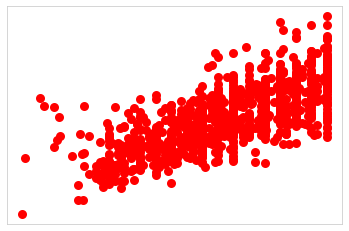

In [12]:
from matplotlib import pyplot as plt

# Make predictions using the testing set
y_pred = reg.predict(X_test)

# The coefficients
#print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

print(y_pred)
# Plot outputs
#plt.scatter(X_test, y_test, color="black")
#plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.scatter(y_test, y_pred, color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [13]:
if False:
    from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
    from sklearn.svm import SVC

    param_grid = [
        {"kernel": ["linear"]},
        {"kernel": ["poly"], "degree": [2, 3]},
        {"kernel": ["rbf"]},
    ]

    svc = SVC(random_state=0)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

    search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring="roc_auc", cv=cv)
    search.fit(X, y)

Now working on LinR model...
   LinR cross-validating...
   LinR fitting...
   LinR predicting...
LinR


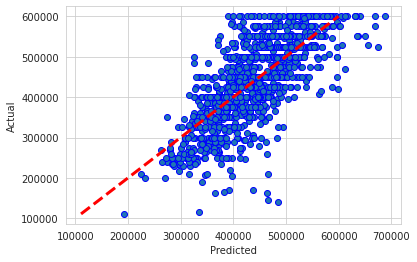

Now working on RF model...
   RF cross-validating...
   RF fitting...
   RF predicting...
RF


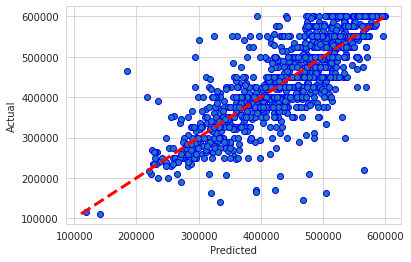

Now working on KNN model...
   KNN cross-validating...
   KNN fitting...
   KNN predicting...
KNN


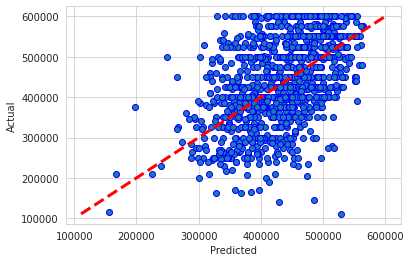

Now working on SVM model...
   SVM cross-validating...
   SVM fitting...
   SVM predicting...
SVM


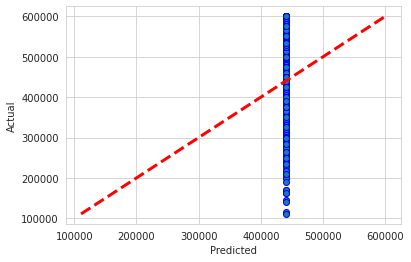

Now working on GNB model...
   GNB cross-validating...
   GNB fitting...
   GNB predicting...
GNB


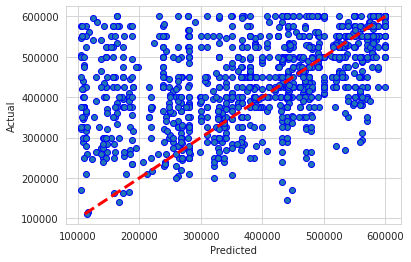

Now working on NEW - Ridge LR model...
   NEW - Ridge LR cross-validating...
   NEW - Ridge LR fitting...
   NEW - Ridge LR predicting...
NEW - Ridge LR


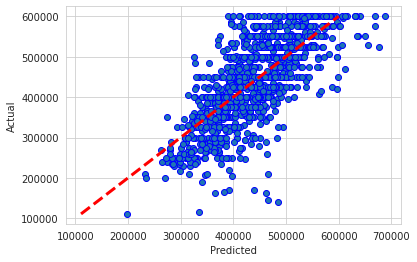

,model,run,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error,test_neg_mean_poisson_deviance,test_neg_mean_gamma_deviance
0,LinR,1,0.131589,0.014802,-59952.783966,-5.876884e+09,-76660.836871,-14610.855463,-0.038652
1,LinR,2,0.226373,0.009287,-61380.052605,-6.206750e+09,-78782.930771,-15537.842395,-0.041503
2,LinR,3,0.171693,0.007081,-60321.692896,-5.982878e+09,-77349.067429,-14959.426907,-0.039791
3,LinR,4,0.170011,0.008187,-60927.312890,-6.204008e+09,-78765.524235,-15557.439421,-0.041772
4,LinR,5,0.161662,0.018306,-59929.272064,-5.950395e+09,-77138.803690,-14717.987698,-0.038704
5,RF,1,12.950654,0.135176,-46552.018770,-4.023980e+09,-63434.845883,-10018.233364,-0.026729
6,RF,2,18.821183,0.139963,-47282.568036,-4.361457e+09,-66041.328183,-11175.765081,-0.030917
7,RF,3,13.013968,0.133588,-46525.289306,-4.024335e+09,-63437.647454,-10194.029625,-0.027690
8,RF,4,12.474963,0.135532,-47839.975021,-4.484781e+09,-66968.505469,-11288.993451,-0.030463
9,RF,5,13.182786,0.130252,-46387.869018,-4.072362e+09,-63815.062747,-10209.528541,-0.027305


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd


def run_exps(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''

    dfs = []

    models = [
        #('LogReg Cl', LogisticRegression()),
        #('RF Cl', RandomForestClassifier()),
        #('KNN Cl', KNeighborsClassifier()),
        #('SVM Cl', SVC()),
        ('LinR', LinearRegression()),
        ('RF', RandomForestRegressor()),
        ('KNN', KNeighborsRegressor()),
        ('SVM', SVR()),
        ('GNB', GaussianNB()),
        #          ('XGB', XGBClassifier())
        ('NEW - Ridge LR', linear_model.Ridge(alpha=.5))
    ]

    results = []
    names = []

    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance']
    # ,'d2_absolute_error_score','d2_pinball_score','d2_tweedie_score'
    target_names = ['malignant', 'benign']
    for name, model in models:
        print(f"Now working on {name} model...")
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        print(f"   {name} cross-validating...")
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        print(f"   {name} fitting...")
        clf = model.fit(X_train, y_train)
        print(f"   {name} predicting...")
        y_pred = clf.predict(X_test)
        print(name)
        mae = metrics.mean_absolute_error(y_test, y_pred)  # NEW
        mse = metrics.mean_squared_error(y_test, y_pred)  # NEW
        r2 = metrics.r2_score(y_test, y_pred)  # NEW
        #print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        #this_df['model'] = name
        this_df.insert(loc=0, column='model', value=name)
        this_df.insert(loc=1, column='run', value=range(1, 6))
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)

        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        plt.show()

    #final.insert(loc=0, column='model2', value=names)
    return final


multi_model_evaluation = run_exps(X_train, y_train, X_test, y_test)
multi_model_evaluation

In [15]:
multi_model_evaluation.sort_values('test_neg_mean_squared_error')
multi_model_evaluation.sort_values('test_neg_mean_absolute_error',ascending=False)

,model,run,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error,test_neg_mean_poisson_deviance,test_neg_mean_gamma_deviance
9,RF,5,13.182786,0.130252,-46387.869018,-4.072362e+09,-63815.062747,-10209.528541,-0.027305
7,RF,3,13.013968,0.133588,-46525.289306,-4.024335e+09,-63437.647454,-10194.029625,-0.027690
5,RF,1,12.950654,0.135176,-46552.018770,-4.023980e+09,-63434.845883,-10018.233364,-0.026729
6,RF,2,18.821183,0.139963,-47282.568036,-4.361457e+09,-66041.328183,-11175.765081,-0.030917
8,RF,4,12.474963,0.135532,-47839.975021,-4.484781e+09,-66968.505469,-11288.993451,-0.030463
29,NEW - Ridge LR,5,0.121196,0.014127,-59921.476431,-5.947895e+09,-77122.594260,-14709.383534,-0.038654
4,LinR,5,0.161662,0.018306,-59929.272064,-5.950395e+09,-77138.803690,-14717.987698,-0.038704
25,NEW - Ridge LR,1,0.062047,0.022644,-59948.239705,-5.875767e+09,-76653.554087,-14609.633854,-0.038655
0,LinR,1,0.131589,0.014802,-59952.783966,-5.876884e+09,-76660.836871,-14610.855463,-0.038652
2,LinR,3,0.171693,0.007081,-60321.692896,-5.982878e+09,-77349.067429,-14959.426907,-0.039791
